In [1]:
from graphviz import Digraph
from autodiff.engine import Value 
from autodiff.NN import MLP

In [2]:
def trace(root):
    nodes, edges = set(), set()
    # def build(v):
    #     if v not in nodes:
    #         nodes.add(v)
    #         for child in v._prev:
    #             edges.add((child, v))
    #             build(child)
    # build(root)
    # return nodes, edges
    def build(v):
        if isinstance(v, list):  # Check if v is a list
            for elem in v:
                if elem not in nodes:
                    nodes.add(elem)
                    for child in elem._prev:
                        edges.add((child, elem))
                        build(child)
        else:
            if v not in nodes:
                nodes.add(v)
                for child in v._prev:
                    edges.add((child, v))
                    build(child)
    build(root)
    return nodes, edges
def draw_dot(root, format='svg', rankdir='LR'):
    assert rankdir in ['LR', 'TB']
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    nodes, edges = trace(root)
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))   
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)   
    return dot

In [3]:
#demo--1
x=[2.0,3.0,-1.0]
n=MLP(3,[4,4,1])
n(x)

Value:data=0.7293543125860338 grad=0

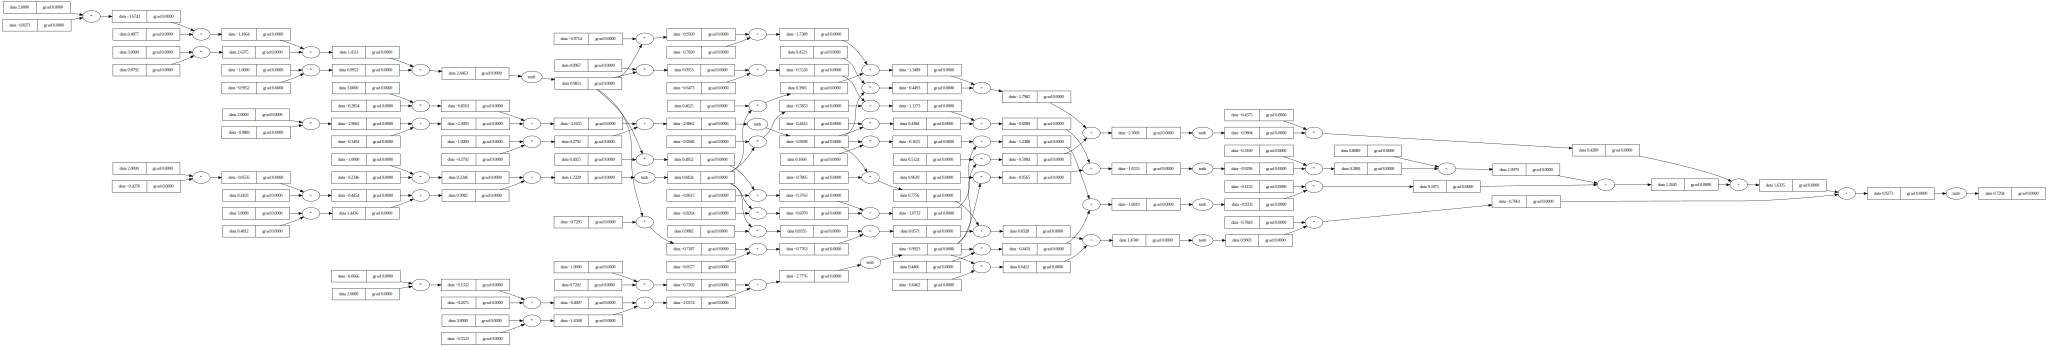

In [4]:
draw_dot(n(x))

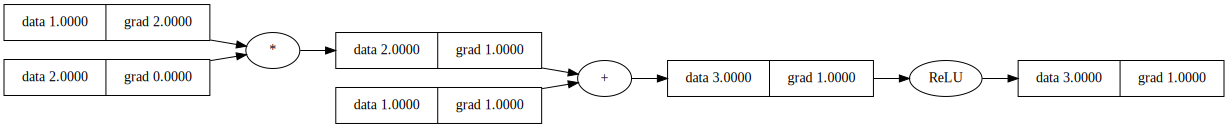

In [5]:
#demo--2
x = Value(1.0)
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

In [6]:
#using torch autograd
import torch
x1=torch.tensor([2.0]).double()  ;x1.requires_grad=True
x2=torch.tensor([0.0]).double()  ;x2.requires_grad=True
w1=torch.tensor([-3.0]).double() ;w1.requires_grad=True
w2=torch.tensor([1.0]).double()  ;w2.requires_grad=True
b=torch.tensor([8.8]).double()   ;b.requires_grad=True
n=x1*w1+x2*w2+b
o=torch.relu(n)
print(o.data.item())
o.backward()

2.8000001907348633


In [7]:
print(f"x2:{x2.grad}")
print(f"x1:{x1.grad}")
print(f"w1:{w1.grad}")
print(f"w2:{w2.grad}")

x2:tensor([1.], dtype=torch.float64)
x1:tensor([-3.], dtype=torch.float64)
w1:tensor([2.], dtype=torch.float64)
w2:tensor([0.], dtype=torch.float64)


In [8]:
x=(2.0,3.0,-1.0)
n=MLP(3,[4,4,1])
n(x)

Value:data=-0.5923881601950977 grad=0

In [9]:
#demo--3
ml=[
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
y=[1.0,-1.0,-1.0,1.0]

In [30]:
for k in range(20):
    # forward pass
    yhat=[n(x) for x in ml]
    mse= sum((yout-ygt)**2  for ygt,yout in zip(y,yhat))
    #backward passz
    for p in n.parameters():
        p.grad=0.0
    mse.backward()
    #update
    for p in n.parameters():
        p.data+=-0.01*p.grad
    print(k,mse.data)

0 0.059618966506678736
1 0.059411807244776765
2 0.0592060362158463
3 0.059001639733852786
4 0.05879860429032924
5 0.05859691655152468
6 0.05839656335560736
7 0.058197531709920786
8 0.057999808788291994
9 0.05780338192839119
10 0.05760823862914105
11 0.05741436654817427
12 0.05722175349933957
13 0.05703038745025437
14 0.05684025651990228
15 0.05665134897627617
16 0.05646365323406451
17 0.05627715785238056
18 0.05609185153253346
19 0.05590772311584019


In [31]:
yhat

[Value:data=0.9075365341671543 grad=-0.1849269316656914,
 Value:data=-0.9764624441128562 grad=0.04707511177428758,
 Value:data=-0.8322270609864783 grad=0.3355458780270435,
 Value:data=0.8634113657742963 grad=-0.27317726845140733]

In [25]:
print(n.layers[0].neurons[0].w[0].grad)
print(n.layers[0].neurons[0].w[0].data)

0.0
-0.05308224152389296
